This example illustrates a few basic functionalities of Plots.jl for scatter and line plots

In [1]:
# We first call the libraries
using Plots
using LaTeXStrings # to be able to put LaTex string in the labels, you can call this library
pyplot()# using the pyplot backend

┌ Info: Recompiling stale cache file /home/charles/.julia/compiled/v1.1/Plots/ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1184
┌ Info: Recompiling stale cache file /home/charles/.julia/compiled/v1.1/PyPlot/oatAj.ji for PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1184


Plots.PyPlotBackend()

In [3]:
# Creating a fake dataset
x = -10:1.:10; y = x.^2; ese_y = sqrt.(y); # errors as sqrt(y)

We create a scatter plot with the scatter command for displaying this dataset

In [4]:
plt = scatter(x,y,
yerr=ese_y, # error bars, can use yerr or xerr keywords
color = :red, # marker internal color
markerstrokecolor = :red, # marker stroke and error bar color
markersize = 10, # marker size
xlabel = "X values", ylabel = L"$y = X^2$",# labels, LaTex string for y, need to add L before the text to declare it
xtickfont = font(14,"Arial"), ytickfont = font(14,"Arial"), # thicks font
xticks = -10:4:10, # X axis values, same thing applies to y
grid = false) # control the display of the internal grid

# you need to set the label font with the `guidefont` argument after the first call, as for this subplot:
plt.subplots[1][:yaxis][:guidefont] = Plots.Font("Arial",18,:hcenter,:vcenter,0.0,RGB{U8}(1.0,0.0,0.0))
plt.subplots[1][:xaxis][:guidefont] = Plots.Font("Arial",18,:hcenter,:vcenter,0.0,RGB{U8}(0.0,0.0,0.0))

#savefig("./Figures/plt1.png") # saving the plot
#plt # to display the plot again

UndefVarError: UndefVarError: U8 not defined

A concatenated version of the above plot can be made using magic areguments:


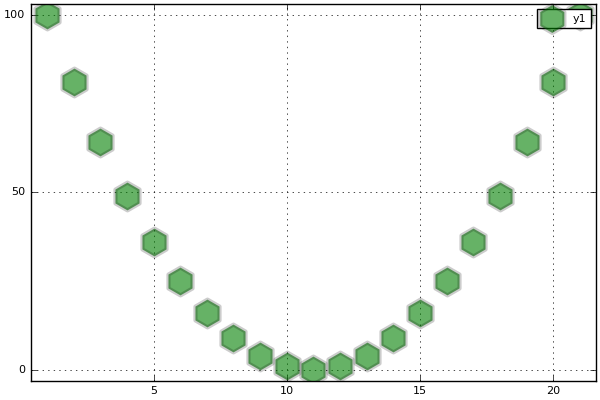

In [16]:
plt_bis = scatter(x,y, err = ese_y, c = :red, markerstrokecolor = :red, ms = 10, 
        xaxis = ("X values", font(14, "Arial"), -10:4:10),  yaxis = (L"$y = X^2$", font(14, "Arial")), 
        grid = false)

# you need to set the label font with the `guidefont` argument after the first call, as for this subplot:
plt_bis.subplots[1][:yaxis][:guidefont] = Plots.Font("Arial",18,:hcenter,:vcenter,0.0,RGB{U8}(1.0,0.0,0.0))
plt_bis.subplots[1][:xaxis][:guidefont] = Plots.Font("Arial",18,:hcenter,:vcenter,0.0,RGB{U8}(0.0,0.0,0.0))
plt_bis
savefig("./Figures/plt1_bis.png")

In [8]:
# Now we can even modify the y values
y2 = y-(x+0.5)
y3 = y2+y-(x+2)

# adding to the existing plot
scatter!(x,y2, marker = (:hexagon, 10, 1.0, :green))
scatter!(x,y3, marker = (:square, 10, 1.0, :purple))

plt
savefig("./Figures/plt2.png")

If we want to delete the first y1 and y2 for clarity, we can delete the corresponding series_list

In [9]:
deleteat!(plt.series_list,1:3) # here we indicate 1 to 3 as we have y1, yerr and y2 as series
plt
savefig("./Figures/plt3.png")

We can even concatenate that in a GIF for a dynamic view of the plot!

In [10]:
plt2 = scatter(x,y,
yerr=ese_y, # to indicate error bars, use the yerr or xerr keywords
color = :red, # this is the marker internal color color
markerstrokecolor = :red, # to set the error bar colors to red
markersize = 10,
xlabel = "X values", 
ylabel = L"$y = X^2$",
xtickfont = font(14,"Arial"),
ytickfont = font(14,"Arial"),
grid = false,
xticks = -10:4:10,
leg=false, # no legend
ylims=(0,200) # fixed limits in y
)

plt2.subplots[1][:yaxis][:guidefont] = Plots.Font("Arial",18,:hcenter,:vcenter,0.0,RGB{U8}(1.0,0.0,0.0))
plt2.subplots[1][:xaxis][:guidefont] = Plots.Font("Arial",18,:hcenter,:vcenter,0.0,RGB{U8}(0.0,0.0,0.0))

# to create the gif and record the frames
anim = Animation()
frame(anim) # we record the first frame

# we delete the first series and add a new one
deleteat!(plt2.series_list,1:2) # here we indicate 1 to 2 as we have y1, yerr as 2 series
scatter!(x,y2, marker = (:hexagon, 10, 1.0, :green)) # adding the y2 serie
frame(anim) # recording a frame

deleteat!(plt2.series_list,1) # we delete the y2 serie
scatter!(x,y3, marker = (:square, 10, 1.0, :purple)) # adding the y3 serie
frame(anim) # recording a frame

# note that the last steps can be embedded in a loop easily, look at the documentation for further details

# recording our gif file with 1 frame per second (to make it even slower, the trick is to record multiple time the same frame)
gif(anim, "./Figures/plt4.gif", fps=1)

INFO: Saved animation to /Users/charles/Documents/Examples/Figures/plt4.gif


Plots.AnimatedGif("/Users/charles/Documents/Examples/Figures/plt4.gif")